## skip-gram모델 구현

In [1]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss

class SimpleSkipGram:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer1 = SoftmaxWithLoss()
        self.loss_layer2 = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h) # out
        l1 = self.loss_layer1.forward(s, contexts[:, 0])
        l2 = self.loss_layer2.forward(s, contexts[:, 1])
        loss = l1 + l2
        return loss

    def backward(self, dout=1):
        dl1 = self.loss_layer1.backward(dout)
        dl2 = self.loss_layer2.backward(dout)
        ds = dl1 + dl2
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None


### 학습 코드 구현

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 3.87
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 3.87
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 3.87
| 에폭 26 |

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


| 에폭 663 |  반복 1 / 2 | 시간 0[s] | 손실 2.16
| 에폭 664 |  반복 1 / 2 | 시간 0[s] | 손실 2.19
| 에폭 665 |  반복 1 / 2 | 시간 0[s] | 손실 2.55
| 에폭 666 |  반복 1 / 2 | 시간 0[s] | 손실 2.12
| 에폭 667 |  반복 1 / 2 | 시간 0[s] | 손실 2.28
| 에폭 668 |  반복 1 / 2 | 시간 0[s] | 손실 2.28
| 에폭 669 |  반복 1 / 2 | 시간 0[s] | 손실 2.45
| 에폭 670 |  반복 1 / 2 | 시간 0[s] | 손실 2.02
| 에폭 671 |  반복 1 / 2 | 시간 0[s] | 손실 2.50
| 에폭 672 |  반복 1 / 2 | 시간 0[s] | 손실 2.50
| 에폭 673 |  반복 1 / 2 | 시간 0[s] | 손실 2.06
| 에폭 674 |  반복 1 / 2 | 시간 0[s] | 손실 2.38
| 에폭 675 |  반복 1 / 2 | 시간 0[s] | 손실 1.96
| 에폭 676 |  반복 1 / 2 | 시간 0[s] | 손실 2.34
| 에폭 677 |  반복 1 / 2 | 시간 0[s] | 손실 2.45
| 에폭 678 |  반복 1 / 2 | 시간 0[s] | 손실 2.10
| 에폭 679 |  반복 1 / 2 | 시간 0[s] | 손실 2.11
| 에폭 680 |  반복 1 / 2 | 시간 0[s] | 손실 2.40
| 에폭 681 |  반복 1 / 2 | 시간 0[s] | 손실 2.33
| 에폭 682 |  반복 1 / 2 | 시간 0[s] | 손실 2.28
| 에폭 683 |  반복 1 / 2 | 시간 0[s] | 손실 2.44
| 에폭 684 |  반복 1 / 2 | 시간 0[s] | 손실 2.28
| 에폭 685 |  반복 1 / 2 | 시간 0[s] | 손실 2.27
| 에폭 686 |  반복 1 / 2 | 시간 0[s] | 손실 2.05
| 에폭 687 |  반복 1

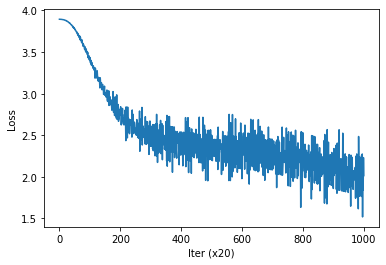

you [ 0.01732344 -0.01589692  0.01473887  0.00165889 -0.00589573]
say [-0.22198525  0.90648764 -0.3286246   0.23703825  0.43309522]
goodbye [ 1.0957779  -0.75245327  1.0041324  -0.88892895 -0.7496982 ]
and [-1.172925   1.0010127 -1.1702005  1.1943144  1.1483741]
i [ 1.1073403  -0.762716    0.98989284 -0.8974569  -0.7442442 ]
hello [-0.41442728 -1.1153427  -0.13718416 -0.465283   -1.1220214 ]
. [ 0.00948572  0.01069376  0.00946608 -0.00693799 -0.0074125 ]


In [2]:
import sys
sys.path.append('..')  
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleSkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

# 단어의 벡터 표현 출력
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])